# Product Classifier

In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup

%matplotlib inline

In [2]:
df=pd.read_csv('product_classes.csv')
df.head()

,productName,productClass
0,"Tea Tree Facewash for acne & pimples, 100ml",Face Wash
1,Anti Hair Fall Kit for complete hair care,Hair Combo
2,"Argan Hair Mask with Argan, Avocado Oil, and M...",Hair Mask
3,Ubtan Bamboo Sheet Mask with Turmeric & Saffro...,Face Mask
4,Niacinamide Bamboo Sheet Mask with Niacinamide...,Face Sheet Mask


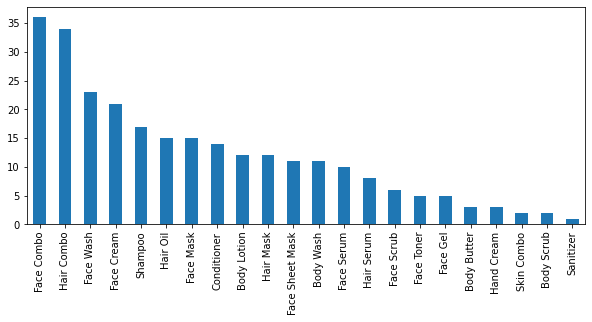

In [3]:
classes=['Shampoo','Conditioner','Hair Oil','Hair Mask','Hair Serum','Face Wash','Face Mask','Face Cream','Face Serum','Face Scrub','Face Toner','Face Gel','Face Sheet Mask','Skin Combo','Face Combo','Hair Combo','Body Butter','Body Wash','Body Lotion','Body Scrub']
plt.figure(figsize=(10,4))
df.productClass.value_counts().plot(kind='bar');

In [4]:
replace_by_space = re.compile('[/(){}\[\]\|@,;]^0-9')
bad_symbols = re.compile('[^a-z #+_]')
#g = re.compile('^0-9\sg\s')
ml = re.compile('ml')
#STOPWORDS = set(stopwords.words('ml'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = replace_by_space.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = bad_symbols.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ml.sub('',text)
    #text = g.sub('',text)
    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [5]:
df['productName'] = df['productName'].apply(clean_text)

In [6]:
def print_plot(index):
    example = df[df.index == index][['productName', 'productClass']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Class:', example[1])

In [7]:
print_plot(0)

tea tree facewash for acne  pimples 
Class: Face Wash


In [8]:
df['productName'].apply(lambda x: len(x.split(' '))).sum()

3146

In [9]:
x = df.productName
y = df.productClass
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [11]:
%%time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = sgd.predict(X_test)

print('accuracy = %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=classes))
#print(confusion_matrix(y_test,y_pred))

accuracy = 0.8
                 precision    recall  f1-score   support

        Shampoo       1.00      0.50      0.67         2
    Conditioner       1.00      0.40      0.57         5
       Hair Oil       0.00      0.00      0.00         0
      Hair Mask       1.00      1.00      1.00         2
     Hair Serum       0.92      0.65      0.76        17
      Face Wash       0.71      0.83      0.77         6
      Face Mask       1.00      1.00      1.00         4
     Face Cream       0.60      1.00      0.75         6
     Face Serum       1.00      1.00      1.00         1
     Face Scrub       1.00      1.00      1.00         2
     Face Toner       1.00      0.25      0.40         4
       Face Gel       1.00      1.00      1.00         2
Face Sheet Mask       0.57      0.80      0.67         5
     Skin Combo       0.67      1.00      0.80         6
     Face Combo       1.00      1.00      1.00         3
     Hair Combo       1.00      1.00      1.00         3
    Body Butter

C:\Users\tulik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
input='Mamaearth Onion Hair Oil'
input=[input]
sgd.predict(input)

array(['Hair Oil'], dtype='<U15')

# Key Ingredient Identifier

In [15]:
df2=pd.read_csv('main_ingredient.csv')
df2.head()

,productName,productIngredient
0,"Tea Tree Facewash for acne & pimples, 100ml",Neem
1,Anti Hair Fall Kit for complete hair care,Bhringraj Oil
2,"Argan Hair Mask with Argan, Avocado Oil, and M...",Argan Oil
3,Ubtan Bamboo Sheet Mask with Turmeric & Saffro...,Turmeric
4,Niacinamide Bamboo Sheet Mask with Niacinamide...,Niacinamide


In [16]:
df2.productIngredient.unique()

array(['Neem', 'Bhringraj Oil', 'Argan Oil', 'Turmeric', 'Niacinamide',
       'Red Onion', 'Onion Seed Oil', 'Walnut Beads',
       'Apple Cider Vinegar', 'Vitamin C', 'Onion Seed Extract',
       'Aloe Vera', 'Cucumber Extract', 'Tea Tree Oil', 'Onion Oil',
       'Carrot Seed Oil', 'Saffron', 'Tea Tree', 'Charcoal', 'Coffee',
       'Fermented Rice Water', 'Rice Bran', 'Retinol', 'Onion',
       'Hyaluronic Acid', 'Rice Water', 'Rose Water ',
       'Activated Charcoal ', 'Kesar', 'Rose Water', 'Cocoa', 'Bhringraj',
       'Lime', 'Activated Charcoal', 'Theobroma Cocoa Seed Butter',
       'Magnesium', 'Castor Oil', 'Biotin', 'Pomegranate Oil',
       'Korean Red Ginseng', 'Cocoa Butter', 'Milk Protein',
       'Coconut Oil', 'Cucumber'], dtype=object)

<AxesSubplot:>

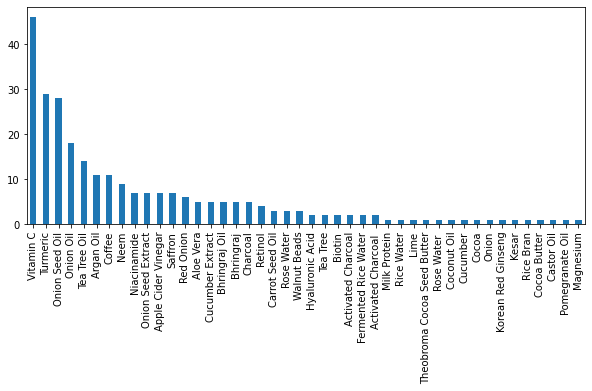

In [22]:
ingredients=['Neem', 'Argan Oil', 'Turmeric', 'Niacinamide',
       'Red Onion', 'Onion Seed Oil', 'Walnut Beads',
       'Apple Cider Vinegar', 'Vitamin C',
       'Aloe Vera', 'Tea Tree Oil', 'Onion Oil',
        'Saffron', 'Tea Tree', 'Charcoal', 'Coffee',
       'Fermented Rice Water', 'Retinol', 'Onion',
       'Hyaluronic Acid', 'Rice Water',
       'Activated Charcoal ', 'Cocoa', 'Bhringraj',
        'Activated Charcoal', 'Biotin',
        'Cucumber']
plt.figure(figsize=(10,4))
df2.productIngredient.value_counts().plot(kind='bar')

In [18]:
df2['productName'] = df2['productName'].apply(clean_text)

In [19]:
x2 = df2.productName
y2 = df2.productIngredient
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state = 42)

In [20]:
sgd2 = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd2.fit(x2_train, y2_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [23]:
%%time

y2_pred = sgd2.predict(x2_test)

print('accuracy = %s' % accuracy_score(y2_pred, y2_test))
print(classification_report(y2_test, y2_pred,target_names=ingredients))
#print(confusion_matrix(y_test,y_pred))

accuracy = 0.775
                      precision    recall  f1-score   support

                Neem       0.00      0.00      0.00         1
           Argan Oil       0.50      0.67      0.57         3
            Turmeric       1.00      1.00      1.00         3
         Niacinamide       1.00      1.00      1.00         3
           Red Onion       1.00      1.00      1.00         1
      Onion Seed Oil       0.00      0.00      0.00         2
        Walnut Beads       1.00      1.00      1.00         1
 Apple Cider Vinegar       0.00      0.00      0.00         0
           Vitamin C       0.00      0.00      0.00         1
           Aloe Vera       0.80      1.00      0.89         4
        Tea Tree Oil       1.00      1.00      1.00         1
           Onion Oil       0.00      0.00      0.00         0
             Saffron       0.00      0.00      0.00         1
            Tea Tree       1.00      0.50      0.67         2
            Charcoal       0.40      0.67      0.50 

C:\Users\tulik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tulik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
input2='Mamaearth Onion Hair Oil'
input2=[input2]
sgd2.predict(input2)

array(['Onion Seed Extract'], dtype='<U20')